In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pylab as plt
import scipy.stats as stats

In [9]:
df = pd.read_csv('colors.csv')
df.head(3)

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215


In [10]:
df.shape

(14157, 4)

In [11]:
df.columns

Index(['name', 'red', 'green', 'blue'], dtype='object')

In [12]:
names = df.name

In [13]:
h = sorted(names.str.len().to_numpy())
h

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


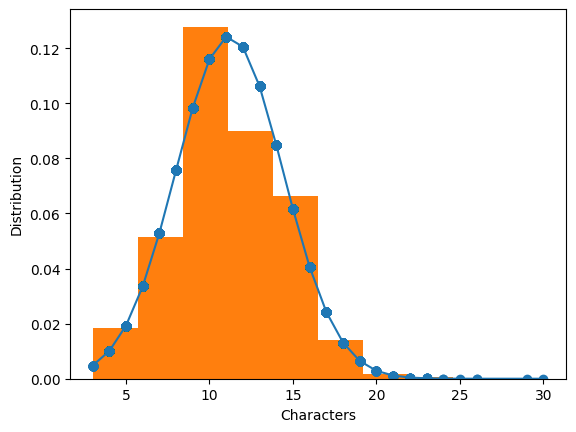

In [14]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,density=True)
plt.xlabel('Characters')
plt.ylabel('Distribution')
plt.show()

In [15]:
np.array(h).max()

30

In [16]:
max_len = 25
t = keras.preprocessing.text.Tokenizer(char_level = True)
t.fit_on_texts(names)
tokantized = t.texts_to_sequences(names)
padded_names = keras.preprocessing.sequence.pad_sequences(tokantized,maxlen=max_len)
padded_names[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       15,  2,  3,  2, 21,  1,  1,  9], dtype=int32)

In [17]:
from keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [18]:
one_hot_names[0][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
one_hot_names.shape

(14157, 25, 28)

In [20]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [21]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(df["red"]), norm(df["green"]), norm(df["blue"])])

In [22]:
normalized_values[0]

array([0.68235294, 0.71372549, 0.34117647])

In [23]:
model = keras.models.Sequential([
    keras.layers.LSTM(256,return_sequences=True,input_shape = (max_len,num_classes)),
    keras.layers.LSTM(512),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3,activation='sigmoid')]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='mse')

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 512)                 │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,901,763 (7.25 MB)

 Trainable params: 1,901,763 (7.25 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=45,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5958 - loss: 0.0632 - val_accuracy: 0.6434 - val_loss: 0.0601
Epoch 2/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6502 - loss: 0.0569 - val_accuracy: 0.6575 - val_loss: 0.0563
Epoch 3/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6679 - loss: 0.0527 - val_accuracy: 0.6186 - val_loss: 0.0542
Epoch 4/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6593 - loss: 0.0509 - val_accuracy: 0.6702 - val_loss: 0.0523
Epoch 5/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6736 - loss: 0.0491 - val_accuracy: 0.6836 - val_loss: 0.0507
Epoch 6/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6794 - loss: 0.0467 - val_accuracy: 0.6815 - val_loss: 0.0493
Epoch 7/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6809 - loss: 0.0450 - val_accuracy: 0.6236 - val_loss: 0.0479
Epoch 8/45
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6841 - loss: 0.0416 - val_accu

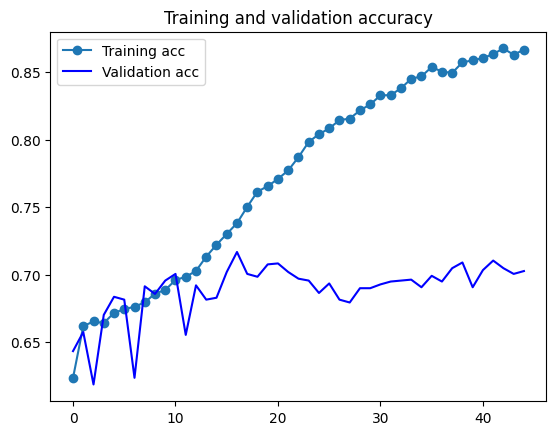

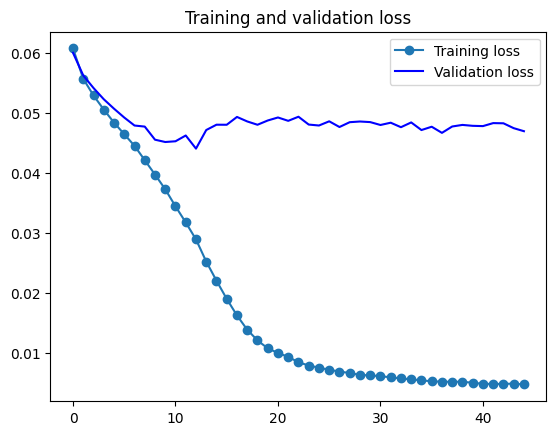

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '-o', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '-o', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [29]:
def scale(n):
    return int(n * 255)

In [30]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=max_len)
    one_hot = to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
blue, R,G,B: 13 47 194


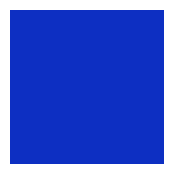

In [42]:
predict("blue")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
yellow, R,G,B: 250 243 11


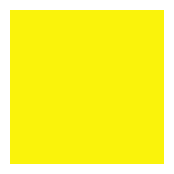

In [43]:
predict("yellow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
voilet, R,G,B: 94 19 134


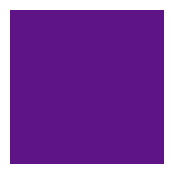

In [44]:
predict("voilet")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
navy, R,G,B: 13 24 83


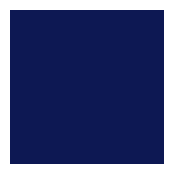

In [45]:
predict("navy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
wavy, R,G,B: 102 111 96


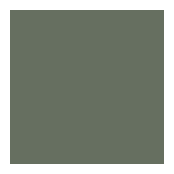

In [46]:
predict("wavy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
auburn, R,G,B: 162 39 24


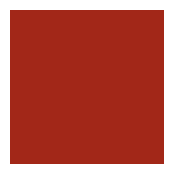

In [47]:
predict("Auburn")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
cal poly pomona green, R,G,B: 37 88 43


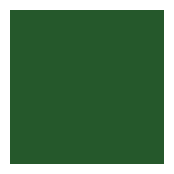

In [48]:
predict("Cal Poly Pomona green")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
celeste, R,G,B: 194 231 230


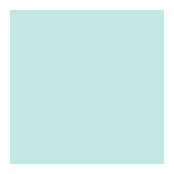

In [49]:
predict("celeste")

In [50]:
model.save("model.h5")

In [51]:
import json

# Save the tokenizer to JSON
tokenizer_config = t.to_json()
with open('tokenizer.json', 'w') as f:
    json.dump(tokenizer_config, f)